In [1]:
from landlab import Component
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import os
import time
import datetime as datetime
from scipy.sparse import csr_matrix
from scipy.sparse import linalg

In [2]:
import numpy as np
import scipy.io as io
glacier_component_path='/home/shashank/Shashank_Github_Packages/old_landlab/landlab/landlab/components/glacier/glacier/'
import sys
sys.path.insert(0,glacier_component_path)
#from glacier import glacier
import glacier
from landlab import RasterModelGrid

In [3]:
def flatten(B,b_dot):
    ### flatten two dimensional matrix
    B = B.T.flatten()
    B[np.isnan(B)] = 0
    S = B
    b_dot = b_dot.T.flatten()
    return B,b_dot,S

### TO Do
######will have to include this in the pythonpath to use the module

In [4]:
data_dir='/home/shashank/nobackup_shashank/landlab/glacier/'
input_file=os.path.join(data_dir,'mb4_spin1.mat')
data_fil=io.loadmat(input_file)

In [5]:
data_fil

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Feb 10 08:52:02 2015',
 '__version__': '1.0',
 '__globals__': [],
 'mb4balance_sum': array([[-300., -300., -300., ..., -300., -300., -300.],
        [-300., -300., -300., ..., -300., -300., -300.],
        [-300., -300., -300., ..., -300., -300., -300.],
        ..., 
        [-300., -300., -300., ..., -300., -300., -300.],
        [-300., -300., -300., ..., -300., -300., -300.],
        [-300., -300., -300., ..., -300., -300., -300.]]),
 'b_dot': array([[-25., -25., -25., ..., -25., -25., -25.],
        [-25., -25., -25., ..., -25., -25., -25.],
        [-25., -25., -25., ..., -25., -25., -25.],
        ..., 
        [-25., -25., -25., ..., -25., -25., -25.],
        [-25., -25., -25., ..., -25., -25., -25.],
        [-25., -25., -25., ..., -25., -25., -25.]]),
 'new_dem': array([[  680.8218,   693.7878,   719.5477, ...,  1689.533 ,  1696.824 ,
          1711.151 ],
        [  659.343 ,   672.5099,   690.7256, ..

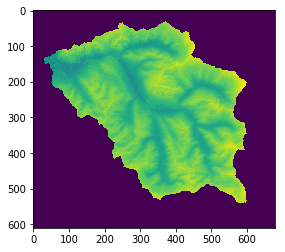

In [6]:
plt.imshow(data_fil['b_dot'])

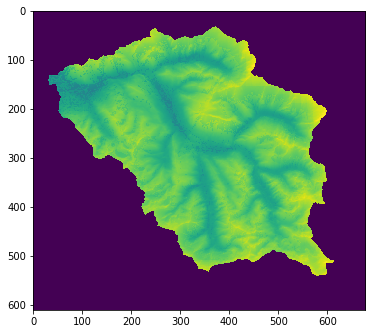

In [7]:
fig,ax=plt.subplots(figsize=(8,5.5))
ax.imshow(data_fil['mb4balance_sum'])

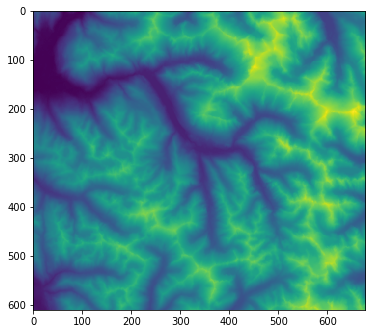

In [8]:
fig,ax=plt.subplots(figsize=(8,5.5))
ax.imshow(data_fil['new_dem'])

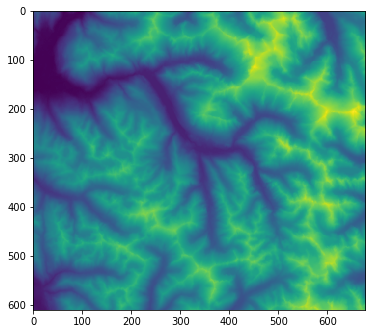

In [9]:
fig,ax=plt.subplots(figsize=(8,5.5))
ax.imshow(data_fil['B'])

In [10]:
B = data_fil['B']
b_dot = data_fil['b_dot']
dx = data_fil['dx'][0,0]
dy = data_fil['dy'][0,0]
nx = np.int_(data_fil['nx'][0,0])
ny = np.int_(data_fil['ny'][0,0])
t_stop = 500
dt = 0.08333
t = 0

In [11]:
dx

50

In [12]:
B, b_dot, S = flatten(B,b_dot)
dictionary = {'S':S,'B':B,'b_dot':b_dot,'dt':dt,'t_STOP':t_stop,'t':t,'dx':dx,'nx':nx,'ny':ny}
grid = RasterModelGrid((int(ny),int(nx)),int(dx))

In [13]:
gla = glacier.Glacier(grid,dictionary)

In [14]:
gla.recursive_steps()

BKS: At t=    0.08 yr ALPHA_I=1.21% and maxima are: H(274000) = 0.252977 			S(397925)=2734.260000

BKS: At t=    0.17 yr ALPHA_I=1.21% and maxima are: H(274000) = 0.505955 			S(397925)=2734.260000

BKS: At t=    0.25 yr ALPHA_I=1.21% and maxima are: H(274000) = 0.758932 			S(397925)=2734.260000

BKS: At t=    0.33 yr ALPHA_I=1.21% and maxima are: H(274000) = 1.011909 			S(397925)=2734.260000

BKS: At t=    0.42 yr ALPHA_I=1.21% and maxima are: H(274000) = 1.264887 			S(397925)=2734.260000

BKS: At t=    0.50 yr ALPHA_I=1.21% and maxima are: H(274000) = 1.517864 			S(397925)=2734.260000

BKS: At t=    0.58 yr ALPHA_I=1.21% and maxima are: H(274000) = 1.770842 			S(397925)=2734.260000

BKS: At t=    0.67 yr ALPHA_I=1.21% and maxima are: H(274000) = 2.023819 			S(397925)=2734.260000

BKS: At t=    0.75 yr ALPHA_I=1.21% and maxima are: H(274000) = 2.276797 			S(397925)=2734.260000

BKS: At t=    0.83 yr ALPHA_I=1.21% and maxima are: H(274000) = 2.529775 			S(397925)=2734.260000

BKS: At t=

BKS: At t=    7.00 yr ALPHA_I=1.21% and maxima are: H(273998) = 29.491381 			S(397925)=2734.260000

BKS: At t=    7.08 yr ALPHA_I=1.21% and maxima are: H(273998) = 30.476878 			S(397925)=2734.260000

BKS: At t=    7.17 yr ALPHA_I=1.21% and maxima are: H(273998) = 31.434716 			S(397925)=2734.260000

BKS: At t=    7.25 yr ALPHA_I=1.21% and maxima are: H(273998) = 32.354482 			S(397925)=2734.260000

BKS: At t=    7.33 yr ALPHA_I=1.21% and maxima are: H(273998) = 33.226769 			S(397925)=2734.260000

BKS: At t=    7.42 yr ALPHA_I=1.21% and maxima are: H(273998) = 34.043665 			S(397925)=2734.260000

BKS: At t=    7.50 yr ALPHA_I=1.21% and maxima are: H(273998) = 34.799183 			S(397925)=2734.260000

BKS: At t=    7.58 yr ALPHA_I=1.21% and maxima are: H(273998) = 35.489568 			S(397925)=2734.260000

BKS: At t=    7.67 yr ALPHA_I=1.21% and maxima are: H(273998) = 36.113446 			S(397925)=2734.260000

BKS: At t=    7.75 yr ALPHA_I=1.21% and maxima are: H(273998) = 36.671775 			S(397925)=2734.260000



BKS: At t=   13.83 yr ALPHA_I=1.21% and maxima are: H(358282) = 53.322103 			S(397925)=2734.260000

BKS: At t=   13.92 yr ALPHA_I=1.21% and maxima are: H(358282) = 53.510678 			S(397925)=2734.260000

BKS: At t=   14.00 yr ALPHA_I=1.21% and maxima are: H(358282) = 53.694222 			S(397925)=2734.260000

BKS: At t=   14.08 yr ALPHA_I=1.21% and maxima are: H(358282) = 53.872818 			S(397925)=2734.260000

BKS: At t=   14.17 yr ALPHA_I=1.21% and maxima are: H(358282) = 54.046561 			S(397925)=2734.260000

BKS: At t=   14.25 yr ALPHA_I=1.21% and maxima are: H(358282) = 54.215552 			S(397925)=2734.260000

BKS: At t=   14.33 yr ALPHA_I=1.21% and maxima are: H(358282) = 54.379891 			S(397925)=2734.260000

BKS: At t=   14.42 yr ALPHA_I=1.21% and maxima are: H(358282) = 54.539676 			S(397925)=2734.260000

BKS: At t=   14.50 yr ALPHA_I=1.21% and maxima are: H(358282) = 54.694999 			S(397925)=2734.260000

BKS: At t=   14.58 yr ALPHA_I=1.21% and maxima are: H(358282) = 54.845946 			S(397925)=2734.260000



BKS: At t=   20.67 yr ALPHA_I=1.22% and maxima are: H(360103) = 67.927420 			S(397925)=2734.260000

BKS: At t=   20.75 yr ALPHA_I=1.22% and maxima are: H(360103) = 68.071755 			S(397925)=2734.260000

BKS: At t=   20.83 yr ALPHA_I=1.22% and maxima are: H(360103) = 68.213383 			S(397925)=2734.260000

BKS: At t=   20.92 yr ALPHA_I=1.22% and maxima are: H(360103) = 68.352363 			S(397925)=2734.260000

BKS: At t=   21.00 yr ALPHA_I=1.22% and maxima are: H(360103) = 68.488753 			S(397925)=2734.260000

BKS: At t=   21.08 yr ALPHA_I=1.23% and maxima are: H(360103) = 68.622611 			S(397925)=2734.260000

BKS: At t=   21.17 yr ALPHA_I=1.23% and maxima are: H(360103) = 68.753990 			S(397925)=2734.260000

BKS: At t=   21.25 yr ALPHA_I=1.23% and maxima are: H(360103) = 68.882941 			S(397925)=2734.260000

BKS: At t=   21.33 yr ALPHA_I=1.23% and maxima are: H(360103) = 69.009516 			S(397925)=2734.260000

BKS: At t=   21.42 yr ALPHA_I=1.23% and maxima are: H(360103) = 69.133762 			S(397925)=2734.260000



BKS: At t=   27.50 yr ALPHA_I=1.27% and maxima are: H(360103) = 74.069687 			S(397925)=2734.260000

BKS: At t=   27.58 yr ALPHA_I=1.27% and maxima are: H(360103) = 74.100628 			S(397925)=2734.260000

BKS: At t=   27.67 yr ALPHA_I=1.27% and maxima are: H(360103) = 74.130946 			S(397925)=2734.260000

BKS: At t=   27.75 yr ALPHA_I=1.27% and maxima are: H(360103) = 74.160652 			S(397925)=2734.260000

BKS: At t=   27.83 yr ALPHA_I=1.27% and maxima are: H(360103) = 74.189757 			S(397925)=2734.260000

BKS: At t=   27.92 yr ALPHA_I=1.27% and maxima are: H(360103) = 74.218269 			S(397925)=2734.260000

BKS: At t=   28.00 yr ALPHA_I=1.27% and maxima are: H(360103) = 74.246200 			S(397925)=2734.260000

BKS: At t=   28.08 yr ALPHA_I=1.27% and maxima are: H(360103) = 74.273559 			S(397925)=2734.260000

BKS: At t=   28.17 yr ALPHA_I=1.28% and maxima are: H(360103) = 74.300355 			S(397925)=2734.260000

BKS: At t=   28.25 yr ALPHA_I=1.28% and maxima are: H(360103) = 74.326599 			S(397925)=2734.260000



BKS: At t=   34.33 yr ALPHA_I=1.34% and maxima are: H(266658) = 79.570222 			S(397925)=2734.260000

BKS: At t=   34.42 yr ALPHA_I=1.34% and maxima are: H(266658) = 79.640107 			S(397925)=2734.260000

BKS: At t=   34.50 yr ALPHA_I=1.34% and maxima are: H(266658) = 79.709137 			S(397925)=2734.260000

BKS: At t=   34.58 yr ALPHA_I=1.34% and maxima are: H(266658) = 79.777322 			S(397925)=2734.260000

BKS: At t=   34.67 yr ALPHA_I=1.34% and maxima are: H(266658) = 79.844675 			S(397925)=2734.260000

BKS: At t=   34.75 yr ALPHA_I=1.34% and maxima are: H(266658) = 79.911208 			S(397925)=2734.260000

BKS: At t=   34.83 yr ALPHA_I=1.34% and maxima are: H(266658) = 79.976934 			S(397925)=2734.260000

BKS: At t=   34.92 yr ALPHA_I=1.34% and maxima are: H(266658) = 80.041865 			S(397925)=2734.260000

BKS: At t=   35.00 yr ALPHA_I=1.34% and maxima are: H(266658) = 80.106014 			S(397925)=2734.260000

BKS: At t=   35.08 yr ALPHA_I=1.35% and maxima are: H(266658) = 80.169390 			S(397925)=2734.260000



BKS: At t=   41.17 yr ALPHA_I=1.43% and maxima are: H(265452) = 90.710600 			S(397925)=2734.260000

BKS: At t=   41.25 yr ALPHA_I=1.43% and maxima are: H(265452) = 90.889463 			S(397925)=2734.260000

BKS: At t=   41.33 yr ALPHA_I=1.43% and maxima are: H(265452) = 91.065499 			S(397925)=2734.260000

BKS: At t=   41.42 yr ALPHA_I=1.43% and maxima are: H(265452) = 91.238809 			S(397925)=2734.260000

BKS: At t=   41.50 yr ALPHA_I=1.43% and maxima are: H(265452) = 91.409425 			S(397925)=2734.260000

BKS: At t=   41.58 yr ALPHA_I=1.43% and maxima are: H(265452) = 91.577289 			S(397925)=2734.260000

BKS: At t=   41.66 yr ALPHA_I=1.43% and maxima are: H(265452) = 91.742245 			S(397925)=2734.260000

BKS: At t=   41.75 yr ALPHA_I=1.43% and maxima are: H(265452) = 91.904069 			S(397925)=2734.260000

BKS: At t=   41.83 yr ALPHA_I=1.44% and maxima are: H(265452) = 92.062519 			S(397925)=2734.260000

BKS: At t=   41.91 yr ALPHA_I=1.44% and maxima are: H(265452) = 92.217395 			S(397925)=2734.260000



BKS: At t=   48.00 yr ALPHA_I=1.51% and maxima are: H(265452) = 98.568103 			S(397925)=2734.260000

BKS: At t=   48.08 yr ALPHA_I=1.52% and maxima are: H(265452) = 98.615362 			S(397925)=2734.260000

BKS: At t=   48.16 yr ALPHA_I=1.52% and maxima are: H(265452) = 98.662219 			S(397925)=2734.260000

BKS: At t=   48.25 yr ALPHA_I=1.52% and maxima are: H(265452) = 98.708694 			S(397925)=2734.260000

BKS: At t=   48.33 yr ALPHA_I=1.52% and maxima are: H(265452) = 98.754807 			S(397925)=2734.260000

BKS: At t=   48.41 yr ALPHA_I=1.52% and maxima are: H(265452) = 98.800576 			S(397925)=2734.260000

BKS: At t=   48.50 yr ALPHA_I=1.52% and maxima are: H(265452) = 98.846018 			S(397925)=2734.260000

BKS: At t=   48.58 yr ALPHA_I=1.52% and maxima are: H(265452) = 98.891152 			S(397925)=2734.260000

BKS: At t=   48.66 yr ALPHA_I=1.52% and maxima are: H(265452) = 98.935990 			S(397925)=2734.260000

BKS: At t=   48.75 yr ALPHA_I=1.53% and maxima are: H(265452) = 98.980547 			S(397925)=2734.260000



BKS: At t=   54.83 yr ALPHA_I=1.59% and maxima are: H(265452) = 101.607860 			S(397925)=2734.260000

BKS: At t=   54.91 yr ALPHA_I=1.59% and maxima are: H(265452) = 101.632434 			S(397925)=2734.260000

BKS: At t=   55.00 yr ALPHA_I=1.59% and maxima are: H(265452) = 101.656615 			S(397925)=2734.260000

BKS: At t=   55.08 yr ALPHA_I=1.59% and maxima are: H(265452) = 101.680412 			S(397925)=2734.260000

BKS: At t=   55.16 yr ALPHA_I=1.59% and maxima are: H(265452) = 101.703831 			S(397925)=2734.260000

BKS: At t=   55.25 yr ALPHA_I=1.59% and maxima are: H(265452) = 101.726878 			S(397925)=2734.260000

BKS: At t=   55.33 yr ALPHA_I=1.60% and maxima are: H(265452) = 101.749562 			S(397925)=2734.260000

BKS: At t=   55.41 yr ALPHA_I=1.60% and maxima are: H(265452) = 101.771889 			S(397925)=2734.260000

BKS: At t=   55.50 yr ALPHA_I=1.60% and maxima are: H(265452) = 101.793867 			S(397925)=2734.260000

BKS: At t=   55.58 yr ALPHA_I=1.60% and maxima are: H(265452) = 101.815503 			S(397925)=273

BKS: At t=   61.66 yr ALPHA_I=1.66% and maxima are: H(265452) = 103.250318 			S(397925)=2734.260000

BKS: At t=   61.75 yr ALPHA_I=1.66% and maxima are: H(265452) = 103.266034 			S(397925)=2734.260000

BKS: At t=   61.83 yr ALPHA_I=1.66% and maxima are: H(265452) = 103.281396 			S(397925)=2734.260000

BKS: At t=   61.91 yr ALPHA_I=1.66% and maxima are: H(265452) = 103.296413 			S(397925)=2734.260000

BKS: At t=   62.00 yr ALPHA_I=1.66% and maxima are: H(265452) = 103.311092 			S(397925)=2734.260000

BKS: At t=   62.08 yr ALPHA_I=1.66% and maxima are: H(265452) = 103.325443 			S(397925)=2734.260000

BKS: At t=   62.16 yr ALPHA_I=1.66% and maxima are: H(265452) = 103.339474 			S(397925)=2734.260000

BKS: At t=   62.25 yr ALPHA_I=1.66% and maxima are: H(265452) = 103.353196 			S(397925)=2734.260000

BKS: At t=   62.33 yr ALPHA_I=1.66% and maxima are: H(265452) = 103.366618 			S(397925)=2734.260000

BKS: At t=   62.41 yr ALPHA_I=1.67% and maxima are: H(265452) = 103.379752 			S(397925)=273

BKS: At t=   68.50 yr ALPHA_I=1.72% and maxima are: H(265452) = 104.217788 			S(397925)=2734.260000

BKS: At t=   68.58 yr ALPHA_I=1.72% and maxima are: H(265452) = 104.233258 			S(397925)=2734.260000

BKS: At t=   68.66 yr ALPHA_I=1.72% and maxima are: H(265452) = 104.248811 			S(397925)=2734.260000

BKS: At t=   68.75 yr ALPHA_I=1.72% and maxima are: H(265452) = 104.264439 			S(397925)=2734.260000

BKS: At t=   68.83 yr ALPHA_I=1.72% and maxima are: H(265452) = 104.280131 			S(397925)=2734.260000

BKS: At t=   68.91 yr ALPHA_I=1.72% and maxima are: H(265452) = 104.295878 			S(397925)=2734.260000

BKS: At t=   69.00 yr ALPHA_I=1.73% and maxima are: H(265452) = 104.311668 			S(397925)=2734.260000

BKS: At t=   69.08 yr ALPHA_I=1.73% and maxima are: H(265452) = 104.327491 			S(397925)=2734.260000

BKS: At t=   69.16 yr ALPHA_I=1.73% and maxima are: H(265452) = 104.343336 			S(397925)=2734.260000

BKS: At t=   69.25 yr ALPHA_I=1.73% and maxima are: H(265452) = 104.359192 			S(397925)=273

BKS: At t=   75.33 yr ALPHA_I=1.77% and maxima are: H(265452) = 105.336862 			S(397925)=2734.260000

BKS: At t=   75.41 yr ALPHA_I=1.77% and maxima are: H(265452) = 105.347651 			S(397925)=2734.260000

BKS: At t=   75.50 yr ALPHA_I=1.77% and maxima are: H(265452) = 105.358310 			S(397925)=2734.260000

BKS: At t=   75.58 yr ALPHA_I=1.77% and maxima are: H(265452) = 105.368838 			S(397925)=2734.260000

BKS: At t=   75.66 yr ALPHA_I=1.77% and maxima are: H(265452) = 105.379234 			S(397925)=2734.260000

BKS: At t=   75.75 yr ALPHA_I=1.77% and maxima are: H(265452) = 105.389498 			S(397925)=2734.260000

BKS: At t=   75.83 yr ALPHA_I=1.77% and maxima are: H(265452) = 105.399629 			S(397925)=2734.260000

BKS: At t=   75.91 yr ALPHA_I=1.77% and maxima are: H(265452) = 105.409627 			S(397925)=2734.260000

BKS: At t=   76.00 yr ALPHA_I=1.77% and maxima are: H(265452) = 105.419492 			S(397925)=2734.260000

BKS: At t=   76.08 yr ALPHA_I=1.77% and maxima are: H(265452) = 105.429224 			S(397925)=273

BKS: At t=   82.16 yr ALPHA_I=1.81% and maxima are: H(265452) = 105.847465 			S(397925)=2734.260000

BKS: At t=   82.25 yr ALPHA_I=1.81% and maxima are: H(265452) = 105.850283 			S(397925)=2734.260000

BKS: At t=   82.33 yr ALPHA_I=1.81% and maxima are: H(265452) = 105.853047 			S(397925)=2734.260000

BKS: At t=   82.41 yr ALPHA_I=1.82% and maxima are: H(265452) = 105.855759 			S(397925)=2734.260000

BKS: At t=   82.50 yr ALPHA_I=1.82% and maxima are: H(265452) = 105.858419 			S(397925)=2734.260000

BKS: At t=   82.58 yr ALPHA_I=1.82% and maxima are: H(265452) = 105.861028 			S(397925)=2734.260000

BKS: At t=   82.66 yr ALPHA_I=1.82% and maxima are: H(265452) = 105.863587 			S(397925)=2734.260000

BKS: At t=   82.75 yr ALPHA_I=1.82% and maxima are: H(265452) = 105.866097 			S(397925)=2734.260000

BKS: At t=   82.83 yr ALPHA_I=1.82% and maxima are: H(265452) = 105.868559 			S(397925)=2734.260000

BKS: At t=   82.91 yr ALPHA_I=1.82% and maxima are: H(265452) = 105.870974 			S(397925)=273

BKS: At t=   89.00 yr ALPHA_I=1.85% and maxima are: H(265452) = 105.964619 			S(397925)=2734.260000

BKS: At t=   89.08 yr ALPHA_I=1.85% and maxima are: H(265452) = 105.965227 			S(397925)=2734.260000

BKS: At t=   89.16 yr ALPHA_I=1.85% and maxima are: H(265452) = 105.965825 			S(397925)=2734.260000

BKS: At t=   89.25 yr ALPHA_I=1.85% and maxima are: H(265452) = 105.966414 			S(397925)=2734.260000

BKS: At t=   89.33 yr ALPHA_I=1.85% and maxima are: H(265452) = 105.966994 			S(397925)=2734.260000

BKS: At t=   89.41 yr ALPHA_I=1.85% and maxima are: H(265452) = 105.967565 			S(397925)=2734.260000

BKS: At t=   89.50 yr ALPHA_I=1.85% and maxima are: H(265452) = 105.968128 			S(397925)=2734.260000

BKS: At t=   89.58 yr ALPHA_I=1.85% and maxima are: H(265452) = 105.968681 			S(397925)=2734.260000

BKS: At t=   89.66 yr ALPHA_I=1.85% and maxima are: H(265452) = 105.969227 			S(397925)=2734.260000

BKS: At t=   89.75 yr ALPHA_I=1.85% and maxima are: H(265452) = 105.969764 			S(397925)=273

BKS: At t=   95.83 yr ALPHA_I=1.87% and maxima are: H(265452) = 105.995876 			S(397925)=2734.260000

BKS: At t=   95.91 yr ALPHA_I=1.87% and maxima are: H(265452) = 105.996127 			S(397925)=2734.260000

BKS: At t=   96.00 yr ALPHA_I=1.87% and maxima are: H(265452) = 105.996377 			S(397925)=2734.260000

BKS: At t=   96.08 yr ALPHA_I=1.87% and maxima are: H(265452) = 105.996626 			S(397925)=2734.260000

BKS: At t=   96.16 yr ALPHA_I=1.87% and maxima are: H(265452) = 105.996872 			S(397925)=2734.260000

BKS: At t=   96.25 yr ALPHA_I=1.87% and maxima are: H(265452) = 105.997117 			S(397925)=2734.260000

BKS: At t=   96.33 yr ALPHA_I=1.88% and maxima are: H(265452) = 105.997360 			S(397925)=2734.260000

BKS: At t=   96.41 yr ALPHA_I=1.88% and maxima are: H(265452) = 105.997602 			S(397925)=2734.260000

BKS: At t=   96.50 yr ALPHA_I=1.88% and maxima are: H(265452) = 105.997842 			S(397925)=2734.260000

BKS: At t=   96.58 yr ALPHA_I=1.88% and maxima are: H(265452) = 105.998080 			S(397925)=273

BKS: At t=  102.66 yr ALPHA_I=1.90% and maxima are: H(265452) = 106.011843 			S(397925)=2734.260000

BKS: At t=  102.75 yr ALPHA_I=1.90% and maxima are: H(265452) = 106.011988 			S(397925)=2734.260000

BKS: At t=  102.83 yr ALPHA_I=1.90% and maxima are: H(265452) = 106.012132 			S(397925)=2734.260000

BKS: At t=  102.91 yr ALPHA_I=1.90% and maxima are: H(265452) = 106.012276 			S(397925)=2734.260000

BKS: At t=  103.00 yr ALPHA_I=1.90% and maxima are: H(265452) = 106.012418 			S(397925)=2734.260000

BKS: At t=  103.08 yr ALPHA_I=1.90% and maxima are: H(265452) = 106.012559 			S(397925)=2734.260000

BKS: At t=  103.16 yr ALPHA_I=1.90% and maxima are: H(265452) = 106.012700 			S(397925)=2734.260000

BKS: At t=  103.25 yr ALPHA_I=1.90% and maxima are: H(265452) = 106.012839 			S(397925)=2734.260000

BKS: At t=  103.33 yr ALPHA_I=1.90% and maxima are: H(265452) = 106.012977 			S(397925)=2734.260000

BKS: At t=  103.41 yr ALPHA_I=1.90% and maxima are: H(265452) = 106.013114 			S(397925)=273

BKS: At t=  109.50 yr ALPHA_I=1.92% and maxima are: H(265452) = 106.020737 			S(397925)=2734.260000

BKS: At t=  109.58 yr ALPHA_I=1.92% and maxima are: H(265452) = 106.020812 			S(397925)=2734.260000

BKS: At t=  109.66 yr ALPHA_I=1.92% and maxima are: H(265452) = 106.020887 			S(397925)=2734.260000

BKS: At t=  109.75 yr ALPHA_I=1.92% and maxima are: H(265452) = 106.020962 			S(397925)=2734.260000

BKS: At t=  109.83 yr ALPHA_I=1.92% and maxima are: H(265452) = 106.021036 			S(397925)=2734.260000

BKS: At t=  109.91 yr ALPHA_I=1.92% and maxima are: H(265452) = 106.021109 			S(397925)=2734.260000

BKS: At t=  110.00 yr ALPHA_I=1.92% and maxima are: H(265452) = 106.021182 			S(397925)=2734.260000

BKS: At t=  110.08 yr ALPHA_I=1.92% and maxima are: H(265452) = 106.021253 			S(397925)=2734.260000

BKS: At t=  110.16 yr ALPHA_I=1.92% and maxima are: H(265452) = 106.021325 			S(397925)=2734.260000

BKS: At t=  110.25 yr ALPHA_I=1.92% and maxima are: H(265452) = 106.021395 			S(397925)=273

BKS: At t=  116.33 yr ALPHA_I=1.93% and maxima are: H(265452) = 106.025107 			S(397925)=2734.260000

BKS: At t=  116.41 yr ALPHA_I=1.93% and maxima are: H(265452) = 106.025141 			S(397925)=2734.260000

BKS: At t=  116.50 yr ALPHA_I=1.94% and maxima are: H(265452) = 106.025175 			S(397925)=2734.260000

BKS: At t=  116.58 yr ALPHA_I=1.94% and maxima are: H(265452) = 106.025209 			S(397925)=2734.260000

BKS: At t=  116.66 yr ALPHA_I=1.94% and maxima are: H(265452) = 106.025242 			S(397925)=2734.260000

BKS: At t=  116.75 yr ALPHA_I=1.94% and maxima are: H(265452) = 106.025275 			S(397925)=2734.260000

BKS: At t=  116.83 yr ALPHA_I=1.94% and maxima are: H(265452) = 106.025308 			S(397925)=2734.260000

BKS: At t=  116.91 yr ALPHA_I=1.94% and maxima are: H(265452) = 106.025340 			S(397925)=2734.260000

BKS: At t=  117.00 yr ALPHA_I=1.94% and maxima are: H(265452) = 106.025372 			S(397925)=2734.260000

BKS: At t=  117.08 yr ALPHA_I=1.94% and maxima are: H(265452) = 106.025403 			S(397925)=273

BKS: At t=  123.16 yr ALPHA_I=1.95% and maxima are: H(265452) = 106.026941 			S(397925)=2734.260000

BKS: At t=  123.25 yr ALPHA_I=1.95% and maxima are: H(265452) = 106.026954 			S(397925)=2734.260000

BKS: At t=  123.33 yr ALPHA_I=1.95% and maxima are: H(265452) = 106.026966 			S(397925)=2734.260000

BKS: At t=  123.41 yr ALPHA_I=1.95% and maxima are: H(265452) = 106.026979 			S(397925)=2734.260000

BKS: At t=  123.50 yr ALPHA_I=1.95% and maxima are: H(265452) = 106.026991 			S(397925)=2734.260000

BKS: At t=  123.58 yr ALPHA_I=1.95% and maxima are: H(265452) = 106.027003 			S(397925)=2734.260000

BKS: At t=  123.66 yr ALPHA_I=1.95% and maxima are: H(265452) = 106.027015 			S(397925)=2734.260000

BKS: At t=  123.75 yr ALPHA_I=1.95% and maxima are: H(265452) = 106.027026 			S(397925)=2734.260000

BKS: At t=  123.83 yr ALPHA_I=1.95% and maxima are: H(265452) = 106.027038 			S(397925)=2734.260000

BKS: At t=  123.91 yr ALPHA_I=1.95% and maxima are: H(265452) = 106.027049 			S(397925)=273

BKS: At t=  129.99 yr ALPHA_I=1.96% and maxima are: H(265452) = 106.027530 			S(397925)=2734.260000

BKS: At t=  130.08 yr ALPHA_I=1.96% and maxima are: H(265452) = 106.027533 			S(397925)=2734.260000

BKS: At t=  130.16 yr ALPHA_I=1.96% and maxima are: H(265452) = 106.027536 			S(397925)=2734.260000

BKS: At t=  130.24 yr ALPHA_I=1.96% and maxima are: H(265452) = 106.027538 			S(397925)=2734.260000

BKS: At t=  130.33 yr ALPHA_I=1.96% and maxima are: H(265452) = 106.027541 			S(397925)=2734.260000

BKS: At t=  130.41 yr ALPHA_I=1.96% and maxima are: H(265452) = 106.027544 			S(397925)=2734.260000

BKS: At t=  130.49 yr ALPHA_I=1.96% and maxima are: H(265452) = 106.027547 			S(397925)=2734.260000

BKS: At t=  130.58 yr ALPHA_I=1.96% and maxima are: H(265452) = 106.027549 			S(397925)=2734.260000

BKS: At t=  130.66 yr ALPHA_I=1.96% and maxima are: H(265452) = 106.027552 			S(397925)=2734.260000

BKS: At t=  130.74 yr ALPHA_I=1.96% and maxima are: H(265452) = 106.027554 			S(397925)=273

BKS: At t=  136.83 yr ALPHA_I=1.97% and maxima are: H(265452) = 106.027602 			S(397925)=2734.260000

BKS: At t=  136.91 yr ALPHA_I=1.97% and maxima are: H(265452) = 106.027602 			S(397925)=2734.260000

BKS: At t=  136.99 yr ALPHA_I=1.97% and maxima are: H(265452) = 106.027601 			S(397925)=2734.260000

BKS: At t=  137.08 yr ALPHA_I=1.97% and maxima are: H(265452) = 106.027601 			S(397925)=2734.260000

BKS: At t=  137.16 yr ALPHA_I=1.97% and maxima are: H(265452) = 106.027600 			S(397925)=2734.260000

BKS: At t=  137.24 yr ALPHA_I=1.97% and maxima are: H(265452) = 106.027599 			S(397925)=2734.260000

BKS: At t=  137.33 yr ALPHA_I=1.97% and maxima are: H(265452) = 106.027599 			S(397925)=2734.260000

BKS: At t=  137.41 yr ALPHA_I=1.97% and maxima are: H(265452) = 106.027598 			S(397925)=2734.260000

BKS: At t=  137.49 yr ALPHA_I=1.97% and maxima are: H(265452) = 106.027597 			S(397925)=2734.260000

BKS: At t=  137.58 yr ALPHA_I=1.97% and maxima are: H(265452) = 106.027597 			S(397925)=273

BKS: At t=  143.66 yr ALPHA_I=1.98% and maxima are: H(265452) = 106.027513 			S(397925)=2734.260000

BKS: At t=  143.74 yr ALPHA_I=1.98% and maxima are: H(265452) = 106.027512 			S(397925)=2734.260000

BKS: At t=  143.83 yr ALPHA_I=1.98% and maxima are: H(265452) = 106.027510 			S(397925)=2734.260000

BKS: At t=  143.91 yr ALPHA_I=1.98% and maxima are: H(265452) = 106.027509 			S(397925)=2734.260000

BKS: At t=  143.99 yr ALPHA_I=1.98% and maxima are: H(265452) = 106.027508 			S(397925)=2734.260000

BKS: At t=  144.08 yr ALPHA_I=1.98% and maxima are: H(265452) = 106.027506 			S(397925)=2734.260000

BKS: At t=  144.16 yr ALPHA_I=1.98% and maxima are: H(265452) = 106.027505 			S(397925)=2734.260000

BKS: At t=  144.24 yr ALPHA_I=1.98% and maxima are: H(265452) = 106.027504 			S(397925)=2734.260000

BKS: At t=  144.33 yr ALPHA_I=1.98% and maxima are: H(265452) = 106.027502 			S(397925)=2734.260000

BKS: At t=  144.41 yr ALPHA_I=1.98% and maxima are: H(265452) = 106.027501 			S(397925)=273

BKS: At t=  150.49 yr ALPHA_I=1.99% and maxima are: H(265452) = 106.027407 			S(397925)=2734.260000

BKS: At t=  150.58 yr ALPHA_I=1.99% and maxima are: H(265452) = 106.027406 			S(397925)=2734.260000

BKS: At t=  150.66 yr ALPHA_I=1.99% and maxima are: H(265452) = 106.027405 			S(397925)=2734.260000

BKS: At t=  150.74 yr ALPHA_I=1.99% and maxima are: H(265452) = 106.027404 			S(397925)=2734.260000

BKS: At t=  150.83 yr ALPHA_I=1.99% and maxima are: H(265452) = 106.027403 			S(397925)=2734.260000

BKS: At t=  150.91 yr ALPHA_I=1.99% and maxima are: H(265452) = 106.027402 			S(397925)=2734.260000

BKS: At t=  150.99 yr ALPHA_I=1.99% and maxima are: H(265452) = 106.027400 			S(397925)=2734.260000

BKS: At t=  151.08 yr ALPHA_I=1.99% and maxima are: H(265452) = 106.027399 			S(397925)=2734.260000

BKS: At t=  151.16 yr ALPHA_I=1.99% and maxima are: H(265452) = 106.027398 			S(397925)=2734.260000

BKS: At t=  151.24 yr ALPHA_I=1.99% and maxima are: H(265452) = 106.027397 			S(397925)=273

BKS: At t=  157.33 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027330 			S(397925)=2734.260000

BKS: At t=  157.41 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027329 			S(397925)=2734.260000

BKS: At t=  157.49 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027328 			S(397925)=2734.260000

BKS: At t=  157.58 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027328 			S(397925)=2734.260000

BKS: At t=  157.66 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027327 			S(397925)=2734.260000

BKS: At t=  157.74 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027326 			S(397925)=2734.260000

BKS: At t=  157.83 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027325 			S(397925)=2734.260000

BKS: At t=  157.91 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027325 			S(397925)=2734.260000

BKS: At t=  157.99 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027324 			S(397925)=2734.260000

BKS: At t=  158.08 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027323 			S(397925)=273

BKS: At t=  164.16 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027284 			S(397925)=2734.260000

BKS: At t=  164.24 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027284 			S(397925)=2734.260000

BKS: At t=  164.33 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027283 			S(397925)=2734.260000

BKS: At t=  164.41 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027283 			S(397925)=2734.260000

BKS: At t=  164.49 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027283 			S(397925)=2734.260000

BKS: At t=  164.58 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027282 			S(397925)=2734.260000

BKS: At t=  164.66 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027282 			S(397925)=2734.260000

BKS: At t=  164.74 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027282 			S(397925)=2734.260000

BKS: At t=  164.83 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027281 			S(397925)=2734.260000

BKS: At t=  164.91 yr ALPHA_I=2.00% and maxima are: H(265452) = 106.027281 			S(397925)=273

BKS: At t=  170.99 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027261 			S(397925)=2734.260000

BKS: At t=  171.08 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027261 			S(397925)=2734.260000

BKS: At t=  171.16 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027260 			S(397925)=2734.260000

BKS: At t=  171.24 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027260 			S(397925)=2734.260000

BKS: At t=  171.33 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027260 			S(397925)=2734.260000

BKS: At t=  171.41 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027260 			S(397925)=2734.260000

BKS: At t=  171.49 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027260 			S(397925)=2734.260000

BKS: At t=  171.58 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027259 			S(397925)=2734.260000

BKS: At t=  171.66 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027259 			S(397925)=2734.260000

BKS: At t=  171.74 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027259 			S(397925)=273

BKS: At t=  177.83 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027249 			S(397925)=2734.260000

BKS: At t=  177.91 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027249 			S(397925)=2734.260000

BKS: At t=  177.99 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027249 			S(397925)=2734.260000

BKS: At t=  178.08 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027248 			S(397925)=2734.260000

BKS: At t=  178.16 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027248 			S(397925)=2734.260000

BKS: At t=  178.24 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027248 			S(397925)=2734.260000

BKS: At t=  178.33 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027248 			S(397925)=2734.260000

BKS: At t=  178.41 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027248 			S(397925)=2734.260000

BKS: At t=  178.49 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027248 			S(397925)=2734.260000

BKS: At t=  178.58 yr ALPHA_I=2.01% and maxima are: H(265452) = 106.027248 			S(397925)=273

BKS: At t=  184.66 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027242 			S(397925)=2734.260000

BKS: At t=  184.74 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027242 			S(397925)=2734.260000

BKS: At t=  184.83 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027242 			S(397925)=2734.260000

BKS: At t=  184.91 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027242 			S(397925)=2734.260000

BKS: At t=  184.99 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027242 			S(397925)=2734.260000

BKS: At t=  185.08 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027241 			S(397925)=2734.260000

BKS: At t=  185.16 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027241 			S(397925)=2734.260000

BKS: At t=  185.24 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027241 			S(397925)=2734.260000

BKS: At t=  185.33 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027241 			S(397925)=2734.260000

BKS: At t=  185.41 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027241 			S(397925)=273

BKS: At t=  191.49 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027237 			S(397925)=2734.260000

BKS: At t=  191.58 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027237 			S(397925)=2734.260000

BKS: At t=  191.66 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027237 			S(397925)=2734.260000

BKS: At t=  191.74 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027236 			S(397925)=2734.260000

BKS: At t=  191.83 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027236 			S(397925)=2734.260000

BKS: At t=  191.91 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027236 			S(397925)=2734.260000

BKS: At t=  191.99 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027236 			S(397925)=2734.260000

BKS: At t=  192.08 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027236 			S(397925)=2734.260000

BKS: At t=  192.16 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027236 			S(397925)=2734.260000

BKS: At t=  192.24 yr ALPHA_I=2.02% and maxima are: H(265452) = 106.027236 			S(397925)=273

BKS: At t=  198.33 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027232 			S(397925)=2734.260000

BKS: At t=  198.41 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027232 			S(397925)=2734.260000

BKS: At t=  198.49 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027232 			S(397925)=2734.260000

BKS: At t=  198.58 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027232 			S(397925)=2734.260000

BKS: At t=  198.66 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027232 			S(397925)=2734.260000

BKS: At t=  198.74 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027232 			S(397925)=2734.260000

BKS: At t=  198.83 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027232 			S(397925)=2734.260000

BKS: At t=  198.91 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027232 			S(397925)=2734.260000

BKS: At t=  198.99 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027232 			S(397925)=2734.260000

BKS: At t=  199.08 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027232 			S(397925)=273

BKS: At t=  205.16 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027227 			S(397925)=2734.260000

BKS: At t=  205.24 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027227 			S(397925)=2734.260000

BKS: At t=  205.33 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027227 			S(397925)=2734.260000

BKS: At t=  205.41 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027227 			S(397925)=2734.260000

BKS: At t=  205.49 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027227 			S(397925)=2734.260000

BKS: At t=  205.58 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027227 			S(397925)=2734.260000

BKS: At t=  205.66 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027227 			S(397925)=2734.260000

BKS: At t=  205.74 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027227 			S(397925)=2734.260000

BKS: At t=  205.83 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027227 			S(397925)=2734.260000

BKS: At t=  205.91 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027227 			S(397925)=273

BKS: At t=  211.99 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  212.07 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  212.16 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  212.24 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  212.32 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  212.41 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  212.49 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027222 			S(397925)=2734.260000

BKS: At t=  212.57 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027222 			S(397925)=2734.260000

BKS: At t=  212.66 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027222 			S(397925)=2734.260000

BKS: At t=  212.74 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027222 			S(397925)=273

BKS: At t=  218.82 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  218.91 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  218.99 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  219.07 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  219.16 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  219.24 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  219.32 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  219.41 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  219.49 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  219.57 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027218 			S(397925)=273

BKS: At t=  225.66 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027214 			S(397925)=2734.260000

BKS: At t=  225.74 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027214 			S(397925)=2734.260000

BKS: At t=  225.82 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027214 			S(397925)=2734.260000

BKS: At t=  225.91 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027214 			S(397925)=2734.260000

BKS: At t=  225.99 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027214 			S(397925)=2734.260000

BKS: At t=  226.07 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027214 			S(397925)=2734.260000

BKS: At t=  226.16 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027214 			S(397925)=2734.260000

BKS: At t=  226.24 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027214 			S(397925)=2734.260000

BKS: At t=  226.32 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027214 			S(397925)=2734.260000

BKS: At t=  226.41 yr ALPHA_I=2.03% and maxima are: H(265452) = 106.027214 			S(397925)=273

BKS: At t=  232.49 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  232.57 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  232.66 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  232.74 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  232.82 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  232.91 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  232.99 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  233.07 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  233.16 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  233.24 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027211 			S(397925)=273

BKS: At t=  239.32 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027209 			S(397925)=2734.260000

BKS: At t=  239.41 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027209 			S(397925)=2734.260000

BKS: At t=  239.49 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  239.57 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  239.66 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  239.74 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  239.82 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  239.91 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  239.99 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  240.07 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027208 			S(397925)=273

BKS: At t=  246.16 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  246.24 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  246.32 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  246.41 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  246.49 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  246.57 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  246.66 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  246.74 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  246.82 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  246.91 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=273

BKS: At t=  252.99 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  253.07 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  253.16 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  253.24 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  253.32 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  253.41 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  253.49 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  253.57 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  253.66 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  253.74 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=273

BKS: At t=  259.82 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  259.91 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  259.99 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  260.07 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  260.16 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  260.24 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  260.32 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  260.41 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  260.49 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  260.57 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=273

BKS: At t=  266.66 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  266.74 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  266.82 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  266.91 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  266.99 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  267.07 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  267.16 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  267.24 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  267.32 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=2734.260000

BKS: At t=  267.41 yr ALPHA_I=2.04% and maxima are: H(265452) = 106.027207 			S(397925)=273

BKS: At t=  273.49 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  273.57 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  273.66 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  273.74 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  273.82 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  273.91 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  273.99 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  274.07 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  274.16 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027208 			S(397925)=2734.260000

BKS: At t=  274.24 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027208 			S(397925)=273

BKS: At t=  280.32 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027210 			S(397925)=2734.260000

BKS: At t=  280.41 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027210 			S(397925)=2734.260000

BKS: At t=  280.49 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027210 			S(397925)=2734.260000

BKS: At t=  280.57 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027210 			S(397925)=2734.260000

BKS: At t=  280.66 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027210 			S(397925)=2734.260000

BKS: At t=  280.74 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027210 			S(397925)=2734.260000

BKS: At t=  280.82 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027210 			S(397925)=2734.260000

BKS: At t=  280.91 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027210 			S(397925)=2734.260000

BKS: At t=  280.99 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027210 			S(397925)=2734.260000

BKS: At t=  281.07 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027210 			S(397925)=273

BKS: At t=  287.16 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  287.24 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  287.32 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  287.41 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  287.49 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  287.57 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  287.66 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  287.74 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  287.82 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027211 			S(397925)=2734.260000

BKS: At t=  287.91 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027211 			S(397925)=273

BKS: At t=  293.99 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027213 			S(397925)=2734.260000

BKS: At t=  294.07 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027213 			S(397925)=2734.260000

BKS: At t=  294.15 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027213 			S(397925)=2734.260000

BKS: At t=  294.24 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027213 			S(397925)=2734.260000

BKS: At t=  294.32 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027213 			S(397925)=2734.260000

BKS: At t=  294.40 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027213 			S(397925)=2734.260000

BKS: At t=  294.49 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027213 			S(397925)=2734.260000

BKS: At t=  294.57 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027213 			S(397925)=2734.260000

BKS: At t=  294.65 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027213 			S(397925)=2734.260000

BKS: At t=  294.74 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027213 			S(397925)=273

BKS: At t=  300.82 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027215 			S(397925)=2734.260000

BKS: At t=  300.90 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027215 			S(397925)=2734.260000

BKS: At t=  300.99 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027215 			S(397925)=2734.260000

BKS: At t=  301.07 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027215 			S(397925)=2734.260000

BKS: At t=  301.15 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027215 			S(397925)=2734.260000

BKS: At t=  301.24 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027215 			S(397925)=2734.260000

BKS: At t=  301.32 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027215 			S(397925)=2734.260000

BKS: At t=  301.40 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027215 			S(397925)=2734.260000

BKS: At t=  301.49 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027215 			S(397925)=2734.260000

BKS: At t=  301.57 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027215 			S(397925)=273

BKS: At t=  307.65 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027216 			S(397925)=2734.260000

BKS: At t=  307.74 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027216 			S(397925)=2734.260000

BKS: At t=  307.82 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027217 			S(397925)=2734.260000

BKS: At t=  307.90 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027217 			S(397925)=2734.260000

BKS: At t=  307.99 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027217 			S(397925)=2734.260000

BKS: At t=  308.07 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027217 			S(397925)=2734.260000

BKS: At t=  308.15 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027217 			S(397925)=2734.260000

BKS: At t=  308.24 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027217 			S(397925)=2734.260000

BKS: At t=  308.32 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027217 			S(397925)=2734.260000

BKS: At t=  308.40 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027217 			S(397925)=273

BKS: At t=  314.49 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  314.57 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  314.65 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  314.74 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  314.82 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  314.90 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  314.99 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  315.07 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  315.15 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027218 			S(397925)=2734.260000

BKS: At t=  315.24 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027218 			S(397925)=273

BKS: At t=  321.32 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027220 			S(397925)=2734.260000

BKS: At t=  321.40 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027220 			S(397925)=2734.260000

BKS: At t=  321.49 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027220 			S(397925)=2734.260000

BKS: At t=  321.57 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027220 			S(397925)=2734.260000

BKS: At t=  321.65 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027220 			S(397925)=2734.260000

BKS: At t=  321.74 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027220 			S(397925)=2734.260000

BKS: At t=  321.82 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027220 			S(397925)=2734.260000

BKS: At t=  321.90 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027220 			S(397925)=2734.260000

BKS: At t=  321.99 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027220 			S(397925)=2734.260000

BKS: At t=  322.07 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027220 			S(397925)=273

BKS: At t=  328.15 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027221 			S(397925)=2734.260000

BKS: At t=  328.24 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027221 			S(397925)=2734.260000

BKS: At t=  328.32 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027221 			S(397925)=2734.260000

BKS: At t=  328.40 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027221 			S(397925)=2734.260000

BKS: At t=  328.49 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027221 			S(397925)=2734.260000

BKS: At t=  328.57 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027221 			S(397925)=2734.260000

BKS: At t=  328.65 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027221 			S(397925)=2734.260000

BKS: At t=  328.74 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027221 			S(397925)=2734.260000

BKS: At t=  328.82 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027221 			S(397925)=2734.260000

BKS: At t=  328.90 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027221 			S(397925)=273

BKS: At t=  334.99 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027222 			S(397925)=2734.260000

BKS: At t=  335.07 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027222 			S(397925)=2734.260000

BKS: At t=  335.15 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027222 			S(397925)=2734.260000

BKS: At t=  335.24 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027222 			S(397925)=2734.260000

BKS: At t=  335.32 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027222 			S(397925)=2734.260000

BKS: At t=  335.40 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027222 			S(397925)=2734.260000

BKS: At t=  335.49 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027222 			S(397925)=2734.260000

BKS: At t=  335.57 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027222 			S(397925)=2734.260000

BKS: At t=  335.65 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027222 			S(397925)=2734.260000

BKS: At t=  335.74 yr ALPHA_I=2.05% and maxima are: H(265452) = 106.027222 			S(397925)=273

BKS: At t=  341.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  341.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  341.99 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  342.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  342.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  342.24 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  342.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  342.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  342.49 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  342.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=273

BKS: At t=  348.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  348.74 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  348.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  348.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  348.99 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  349.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  349.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  349.24 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  349.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=2734.260000

BKS: At t=  349.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027223 			S(397925)=273

BKS: At t=  355.49 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  355.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  355.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  355.74 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  355.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  355.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  355.99 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  356.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  356.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  356.24 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  362.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  362.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  362.49 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  362.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  362.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  362.74 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  362.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  362.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  362.99 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  363.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  369.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  369.24 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  369.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  369.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  369.49 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  369.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  369.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  369.74 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  369.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  369.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  375.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  376.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  376.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  376.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  376.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  376.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  376.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  376.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  376.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  376.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  382.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  382.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  382.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  383.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  383.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  383.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  383.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  383.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  383.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  383.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  389.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  389.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  389.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  389.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  389.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  390.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  390.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  390.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  390.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  390.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  396.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  396.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  396.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  396.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  396.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  396.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  396.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  397.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  397.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  397.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  403.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  403.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  403.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  403.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  403.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  403.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  403.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  403.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  403.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  404.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  410.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  410.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  410.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  410.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  410.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  410.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  410.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  410.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  410.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  410.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  416.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  417.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  417.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  417.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  417.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  417.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  417.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  417.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  417.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  417.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  423.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  423.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  423.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  424.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  424.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  424.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  424.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  424.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  424.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  424.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  430.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  430.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  430.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  430.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  430.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  431.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  431.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  431.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  431.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  431.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  437.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  437.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  437.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  437.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  437.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  437.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  437.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  438.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  438.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  438.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  444.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  444.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  444.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  444.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  444.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  444.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  444.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  444.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  444.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  445.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  451.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  451.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  451.32 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  451.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  451.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  451.57 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  451.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  451.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  451.82 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  451.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  457.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  458.07 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  458.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  458.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  458.31 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  458.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  458.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  458.56 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  458.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  458.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  464.81 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  464.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  464.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  465.06 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  465.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  465.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  465.31 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  465.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  465.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  465.56 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  471.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  471.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  471.81 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  471.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  471.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  472.06 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  472.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  472.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  472.31 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  472.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  478.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  478.56 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  478.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  478.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  478.81 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  478.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  478.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  479.06 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  479.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  479.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  485.31 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  485.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  485.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  485.56 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  485.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  485.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  485.81 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  485.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  485.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  486.06 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  492.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  492.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  492.31 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  492.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  492.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  492.56 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  492.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  492.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  492.81 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  492.90 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

BKS: At t=  498.98 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  499.06 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  499.15 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  499.23 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  499.31 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  499.40 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  499.48 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  499.56 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  499.65 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=2734.260000

BKS: At t=  499.73 yr ALPHA_I=2.06% and maxima are: H(265452) = 106.027224 			S(397925)=273

In [ ]:
gla

In [ ]:
np.shape(gla.S)

In [15]:
S_map = gla.grid['node']['ice_elevation'] 	### ice surface elevation matrix
H_map = gla.grid['node']['ice_thickness']	### ice thickness matrix
I_map = gla.grid['node']['I_map'] ### ice mask matrix

In [16]:
np.shape(S_map)

(413580,)

In [ ]:
type(ny)

In [ ]:
type(ny.astype(int64))

In [ ]:
type(int(ny))

In [19]:
from landlab.plot import imshow_node_grid

In [20]:
imshow_node_grid(gla,'ice_elevation')

AttributeError: 'Glacier' object has no attribute 'at_node'

TypeError: Invalid dimensions for image data

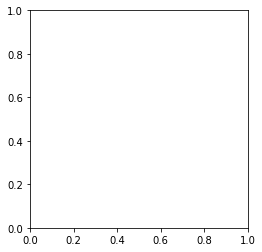

In [22]:
plt.imshow(H_map)